In [30]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

from blockchain import util
util.TIMEOUT = 20

In [31]:
#reading in data
from blockchain import blockexplorer
from blockutils import BlockUtils
import numpy as np 
#estimation
from matplotlib import pyplot as plt
import itertools
import seaborn as sns;
import scipy
from numpy import inf
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.stats import mielke
from scipy.stats import iqr

In [4]:
#latest = blockexplorer.get_block(blockexplorer.get_latest_block().hash)
#latest = blockexplorer.get_block("0000000000000000000857fad93ae6e401153a94f06c4b5adfb733f20a6c13b1")

In [33]:
#Downloads and writes n blocks from the given block to disk
#fromBlocks - hash of a highest block 
def fetch_blocks(fromBlock,n):
    butils = BlockUtils()
    butils.clear()
    status = butils.writeBlock(fromBlock.json)
    blocks = [fromBlock]
    prev = []
    prevHash = None
    for i in range(0,50):
        prevHash=blocks[0].previous_block
        b = blockexplorer.get_block(prevHash)
        blocks.insert(0,b)
        status = butils.writeBlock(b.json)
        prev = b.previous_block
    #return blocks
#fetch_blocks(latest,50)

In [34]:
#load blocks for disk
butils = BlockUtils()
blocks = butils.getBlock()

In [35]:
txs=[block.transactions for block in blocks]

In [36]:
#alt[0] ----> neu[-1]
#transaction data
times=[]
for alltx in txs:
    times.append([tx.time for tx in alltx])
timesDelta = []
for pos in range(0,len(times)):
    timesDelta.append([blocks[pos].time - txtime for txtime in times[pos]])
sizes = []
for alltx in txs:
    sizes.append([tx.size for tx in alltx])
fees = []
for alltx in txs:
    fees.append([tx.fee for tx in alltx])

In [37]:
#price per byte
npSizes = np.array(sizes)
npFees = np.array(fees)
pricePerByte = [np.divide(npFees[i],npSizes[i]) for i in range(0,len(npFees))]

In [38]:
iqrFees = [iqr(pricePerByte[i]) for i in range(0,len(pricePerByte))]
medianFees = [np.median(pricePerByte[i]) for i in range(0,len(pricePerByte))]
#median + iqr and median -iqr
mpiqr = [medianFees[i]+iqrFees[i] for i in range(0,len(iqrFees))]
mmpiqr = [medianFees[i]-iqrFees[i] for i in range(0,len(iqrFees))]

In [39]:
#estimation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [40]:
def estimateLinReg(inputData,polyn):
    inputData=np.array(inputData)
    inputData = inputData.reshape(-1, 1)
    y_train, y_test = train_test_split(inputData, test_size=0.3, random_state=0)
    x_train = np.array(list(range(0,len(y_train)))).reshape(-1,1)
    x_test = np.array(list(range(0,len(y_test)))).reshape(-1,1)
    
    degree=polyn
    linReg=make_pipeline(PolynomialFeatures(degree),LinearRegression());
    linReg.fit(x_train,y_train);
    linReg.score(x_test,y_test);
    return linReg

In [41]:
#estimate median
avgFeeMod = estimateLinReg(medianFees,1)
#estimate iqr+
maxFeeMod = estimateLinReg(mpiqr,1)
#estimate iqr-
minFeeMod = estimateLinReg(mmpiqr,1)

In [42]:
avgFee = avgFeeMod.predict(np.array(list(range(0,len(medianFees)+1))).reshape(-1,1))
maxFee = maxFeeMod.predict(np.array(list(range(0,len(mpiqr)+1))).reshape(-1,1))
minFee = minFeeMod.predict(np.array(list(range(0,len(mmpiqr)+1))).reshape(-1,1))

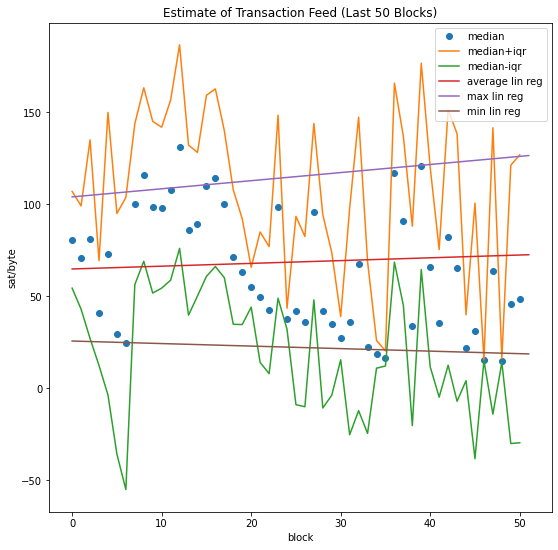

In [43]:
plt.figure(figsize=(9,9))
plt.title("Estimate of Transaction Feed (Last 50 Blocks)")
plt.ylabel("sat/byte")
plt.xlabel("block")
#plt.grid(True)
plt.plot(medianFees,'o',label="median")
plt.plot(mpiqr,label="median+iqr")
plt.plot(mmpiqr,label="median-iqr")
plt.plot(avgFee,label="average lin reg");
plt.plot(maxFee,label="max lin reg");
plt.plot(minFee,label="min lin reg");
plt.legend(loc="best");

In [44]:
#Recommended Transcation cost for next block
print("Max: ",maxFee[-1])
print("Average: ",avgFee[-1])
print("Min: ",minFee[-1])

Max:  [126.45926258]
Average:  [72.53086043]
Min:  [18.60245828]


In [ ]:
#See transaction sizes and how much of such transactions are in a block
#find out the most common tx size

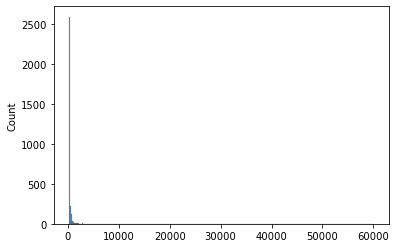

In [93]:
counts = sns.histplot(sorted(sizes[0])[:],binwidth=200)

In [106]:
def getHistBinHeight(data,binWidth):
    data = sorted(data)
    inc = 1
    binHeights = {}
    counter = 0
    for txsize in sortedSizes:
        currentWidth = binWidth*inc
        print(currentWidth)
        if txsize < currentWidth:
            counter = counter+1
        elif txsize >= currentWidth and txsize < currentWidth+binWidth:
            inc = inc + 1
            binHeights[currentWidth] = counter
            counter = 1
        else:
            counter = 1
            inc=determineBin(txsize,binWidth)
            print(inc)
    return binHeights
def determineBin(val,binWidth):
    inc = 1
    detWidth = binWidth*inc
    while val >= binWidth*inc:
        inc = inc + 1
    return inc

In [107]:
sortedSizes = sorted(sizes[0])
getHistBinHeight(sortedSizes,200)
sortedSizes[-3]

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


{200: 543,
 400: 2056,
 600: 224,
 800: 114,
 1000: 37,
 1200: 26,
 1400: 15,
 1600: 13,
 1800: 7,
 2000: 4,
 2200: 7,
 2400: 2,
 2600: 3,
 2800: 3,
 3000: 4,
 3200: 3,
 3400: 3,
 3600: 1,
 3800: 3,
 4400: 2,
 4600: 2,
 5800: 2}

17195

In [77]:
sortedSizes[540:550]

[195, 195, 195, 201, 207, 214, 214, 214, 214, 214]

<Figure size 432x288 with 0 Axes>

<AxesSubplot:ylabel='Density'>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:ylabel='Density'>

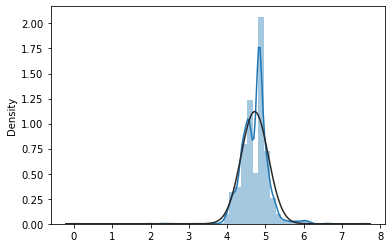

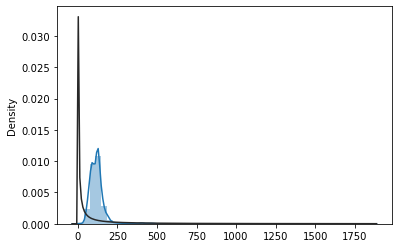

In [17]:
plt.figure()
ppbLn=np.log(pricePerByte[2])
ppbLn[ppbLn == inf] = 0
ppbLn[ppbLn == -inf] = 0
sns.distplot(ppbLn,fit=norm)
plt.figure()
sns.distplot(pricePerByte[2], fit=lognorm)

In [18]:
confidence_level = 0.95
degrees_freedom = len(pricePerByte[2]) - 1
sample_mean = np.median(pricePerByte[2])
sample_mean
sample_standard_error = scipy.stats.sem(pricePerByte[2])
confidence_interval = scipy.stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)

123.31510680360674